**Modelagem Estatística**

A Estatística fornece respostas para muitos padrões importantes nos dados. Modelos estatísticos ajudam a resumir de forma concisa e a inferir sobre os relacionamentos entre as variáveis. A modelagem preditiva geralmente é incompleta sem entender esses relacionamentos.

Veremos agora como ajustar e analisar modelos estatísticos em variáveis-alvo quantitativas (regressão linear) e qualitativas (regressão logística). Usaremos a biblioteca Statsmodels para modelagem estatística. 

# Regressão Linear

## General & Model

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv("datasets/expectativa_vida.csv")

In [22]:
df.head()

ID  life_expectancy   bmi  hiv         gdp  thinness_till19  inf_death  \
0   0             65.0  19.1  0.1  584.259210             17.2         62   
1   1             59.9  18.6  0.1  612.696514             17.5         64   
2   2             59.9  18.1  0.1  631.744976             17.7         66   
3   3             59.5  17.6  0.1  669.959000             17.9         69   
4   4             59.2  17.2  0.1   63.537231             18.2         71   

   school  lifestyle  pop_size  
0    10.1      0.191         3  
1    10.0      0.186         1  
2     9.9      0.181         3  
3     9.8      0.176         2  
4     9.5      0.172         2

In [23]:
df = df.drop(columns=['ID'])
columns_no_target = df.columns[1:]

In [28]:
formula = 'life_expectancy ~ '+'+'.join(columns_no_target)
model = ols(formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1070.
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:18:33   Log-Likelihood:                -6474.0
No. Observations:                2222   AIC:                         1.297e+04
Df Residuals:                    2213   BIC:                         1.302e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          47.4839      0.604     78.560      0.000      46.299      48.669
bmi                 0.0691      0.007      9.595      0.000       0.055       0.083
hiv                -0.6649      0.017    -38.267      0.000      -0.699      -0.631
gdp              7.669e-05   8.28e-06      9.267      0.000    6.05e-05    9.29e-05
thinness_till19    -0.0640      0.028     -2.253      0.024      -0.120      -0.008
inf_death           0.0003      0.001      0.273      0.785      -0.002       0.002
school              1.7813      0.043     41.062      0.000       1.696       1.866
lifestyle          -0.0031      0.001     -4.808      0.000      -0.004      -0.002
pop_size           -0.4265      0.119     -3.586      0.000      -0.660      -0.193
==============================================================================
Omnibus:                       83.618   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.991
Skew:                          -0.308   Prob(JB):                     5.40e-32
Kurtosis:                       4.085   Cond. No.                     9.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Valor do Coeficiente de Determinação R2 (R Squared)

O outro parâmetro para testar a eficácia do modelo é o valor do R2, que representa a variação percentual na variável dependente (life_expectancy) que é explicada pela variável independente (school). 

Quanto maior o valor, melhor a explicabilidade do modelo, sendo o valor mais alto igual a um. No nosso caso, o valor do R2 de 0.621 significa que 62% da variação na variável 'life_expectancy' é explicada pela variável 'school'.

### F Statistic

Enquanto o teste t considera a significância de um único regressor, o teste F avalia a significância de toda a regressão, onde a hipótese nula é que todos os regressores, exceto a constante, são iguais a zero.

Estatística F - Uma medida de quão significativo é o ajuste. É o erro quadrático médio do modelo dividido pelo erro quadrático médio dos resíduos.

Se o valor-p é menor que 0.05 e temos um grande valor da Estatística F, isso indica que há relação entre os regressores e a variável alvo.

Um teste F é um tipo de teste estatístico muito flexível. Você pode usá-los em uma ampla variedade de configurações. Os testes F podem avaliar vários termos do modelo simultaneamente, o que lhes permite comparar os ajustes de diferentes modelos lineares. Por outro lado, os testes t podem avaliar apenas um termo de cada vez.

### Prob (F-statistic):

As estatísticas "Valor F" e "Prob (F)" testam a significância geral do modelo de regressão. Especificamente, eles testam a hipótese nula de que todos os coeficientes de regressão são iguais a zero. Isso testa o modelo completo em relação a um modelo sem variáveis e com a estimativa da variável dependente sendo a média dos valores da variável dependente. O valor F é a razão da soma dos quadrados da regressão média dividida pela soma dos quadrados dos erros médios. Seu valor varia de zero a um número arbitrariamente grande. 

O valor de Prob (F-statistic) é a probabilidade de que a hipótese nula para o modelo completo seja verdadeira (ou seja, que todos os coeficientes de regressão sejam zero). Por exemplo, se o Prob (F) tiver um valor de 0,01000, haverá 1 chance em 100 de que todos os parâmetros de regressão sejam zero. Esse valor baixo implicaria que pelo menos alguns dos parâmetros de regressão são diferentes de zero e que a equação de regressão tem alguma validade no ajuste dos dados (ou seja, as variáveis independentes não são puramente aleatórias em relação à variável dependente).

In [69]:
model.fvalue

1070.2567771698598

### Adj. R-squared

O "coeficiente ajustado de determinação (R2) é a estatística R2 ajustada para o número de parâmetros na equação e o número de observações de dados. É uma estimativa mais conservadora do percentual de variância explicado, especialmente quando o tamanho da amostra é pequeno comparado ao número de parâmetros.

### Log-likelihood

O log da função de probabilidade.

### AIC

O Critério de Informação de Akaike. É calculado como número de parâmetros menos a probabilidade do modelo geral. Uma AIC mais baixa implica um modelo melhor.

### BIC

O Critério de Informação Bayesiano. Semelhante ao AIC, mas possui uma penalidade mais alta para modelos com mais parâmetros.

### Df Residuals - Graus de Liberdade dos Resíduos

DF Residual é o número total de observações (linhas) do conjunto de dados subtraído pelo número de variáveis que estão sendo estimadas. 

Primeiro de tudo, o que significa o termo "graus de liberdade"? Refere-se ao número de informações (logicamente) independentes em uma amostra de dados. Observe que isso é bem diferente de independência estatística.

Como exemplo rápido, suponha que tenhamos uma amostra com quatro valores {4, 2, 6, 8}. Existem quatro informações separadas aqui. Não existe uma conexão específica entre esses valores. Eles são livres para assumir quaisquer valores, em princípio. Poderíamos dizer que existem "quatro graus de liberdade" associados a essa amostra de dados.

Agora, suponha que eu lhe diga que três dos valores da amostra são 4, 2 e 6; e também digo que a média da amostra é 5. Você pode deduzir imediatamente que o quarto valor tem que ser 8. Não há outra possibilidade lógica.

Então, quando digo que a média da amostra é 5, estou introduzindo efetivamente uma restrição. O valor do quarto elemento desconhecido da amostra está sendo implicitamente determinado a partir dos outros três valores e da restrição. Ou seja, uma vez introduzida a restrição, existem apenas três informações logicamente independentes na amostra. Ou seja, existem apenas três "graus de liberdade", depois que a média da amostra é revelada.

Logo:

### Df da Regressão 

É o número de variáveis independentes em nosso modelo de regressão. 


### Df Residual 

É o número total de observações (linhas) do conjunto de dados subtraído pelo número de variáveis que estão sendo estimadas. 

### DF Model

Número de parâmetros no modelo (sem incluir o termo constante, se presente).

### No. de Observações 

É o número de número de observações.

### Coeficiente de Correlação

O coeficiente de correlação de Pearson também é um indicador da extensão e da força da relação linear entre as duas variáveis. As linhas de código abaixo calculam e imprimem o coeficiente de correlação, que acaba sendo 0,787. Essa é uma forte correlação positiva entre as duas variáveis, com o valor mais alto sendo igual a um.

In [30]:
df.corr()

life_expectancy       bmi       hiv       gdp  \
life_expectancy         1.000000  0.591826 -0.570218  0.464855   
bmi                     0.591826  1.000000 -0.244071  0.307833   
hiv                    -0.570218 -0.244071  1.000000 -0.131684   
gdp                     0.464855  0.307833 -0.131684  1.000000   
thinness_till19        -0.494762 -0.561643  0.212936 -0.311480   
inf_death              -0.188937 -0.232869  0.017758 -0.107413   
school                  0.787895  0.604893 -0.239688  0.494044   
lifestyle               0.524638  0.670402 -0.155901  0.466371   
pop_size               -0.072341 -0.045490 -0.008305  0.038196   

                 thinness_till19  inf_death    school  lifestyle  pop_size  
life_expectancy        -0.494762  -0.188937  0.787895   0.524638 -0.072341  
bmi                    -0.561643  -0.232869  0.604893   0.670402 -0.045490  
hiv                     0.212936   0.017758 -0.239688  -0.155901 -0.008305  
gdp                    -0.311480  -0.107413  0.494044   0.466371  0.038196  
thinness_till19         1.000000   0.445476 -0.516931  -0.473522  0.073912  
inf_death               0.445476   1.000000 -0.227441  -0.160287  0.161808  
school                 -0.516931  -0.227441  1.000000   0.645893 -0.059482  
lifestyle              -0.473522  -0.160287  0.645893   1.000000  0.019567  
pop_size                0.073912   0.161808 -0.059482   0.019567  1.000000

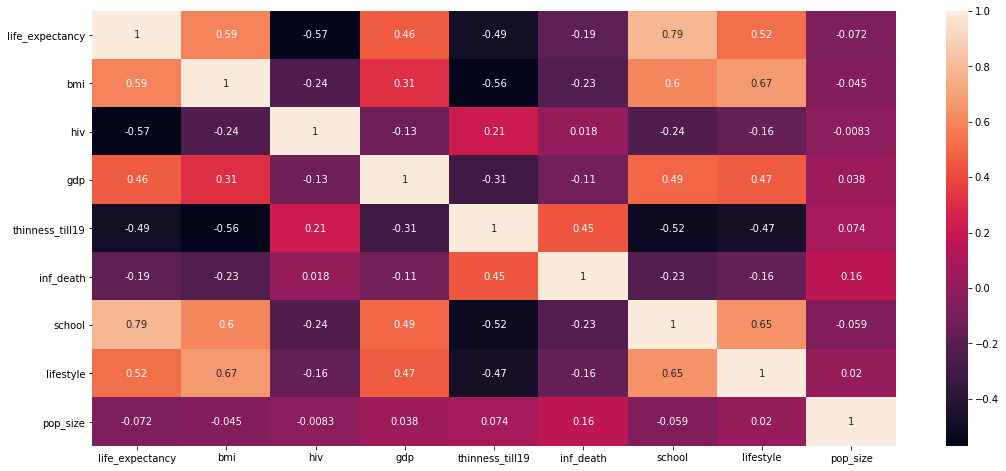

In [29]:
# Correlation Matrix

correlation = df.corr()
plt.figure(figsize=(18,8))
sns.heatmap(correlation, annot = True)
plt.show()

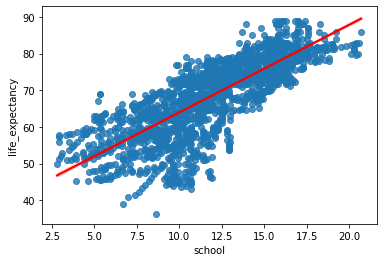

In [31]:
sns.regplot('school', 'life_expectancy', dataset, line_kws = {"color":"r"})

### Multicolinearidade

Abordamos a regressão linear simples usando uma variável. No entanto, nos casos do mundo real, lidaremos com diversas variáveis. Isso é chamado de regressão multivariada. 

Colinearidade é o estado em que duas variáveis são altamente correlacionadas e contêm informações semelhantes sobre a variação em um determinado conjunto de dados. Para detectar colinearidade entre variáveis, basta criar uma matriz de correlação e encontrar variáveis com grandes valores absolutos. 

A multicolinearidade, por outro lado, é mais problemática de detectar porque surge quando três ou mais variáveis, altamente correlacionadas, são incluídas em um modelo. Para tornar as coisas piores, a multicolinearidade pode surgir mesmo quando pares isolados de variáveis não são colineares.

- Condition Number - Essa estatística mede a sensibilidade da saída de uma função em comparação à sua entrada. Quando temos multicolinearidade, podemos esperar flutuações muito maiores para pequenas alterações nos dados; portanto, esperamos ver um número relativamente pequeno, algo abaixo de 30. 

Uma alternativa para resolver o problema é normalizar as variáveis independentes para ter comprimento de unidade. Remover uma das variáveis multicolineares também é uma opção. Também podemos experimentar transformações como escala e padronização.

In [64]:
dataset[["life_expectancy", 
              "bmi", 
              "hiv", 
              "gdp", 
              "thinness_till19", 
              "inf_death", 
              "school", 
              "lifestyle", 
              "pop_size"]].corr()

life_expectancy       bmi       hiv       gdp  \
life_expectancy         1.000000  0.591826 -0.570218  0.464855   
bmi                     0.591826  1.000000 -0.244071  0.307833   
hiv                    -0.570218 -0.244071  1.000000 -0.131684   
gdp                     0.464855  0.307833 -0.131684  1.000000   
thinness_till19        -0.494762 -0.561643  0.212936 -0.311480   
inf_death              -0.188937 -0.232869  0.017758 -0.107413   
school                  0.787895  0.604893 -0.239688  0.494044   
lifestyle               0.524638  0.670402 -0.155901  0.466371   
pop_size               -0.072341 -0.045490 -0.008305  0.038196   

                 thinness_till19  inf_death    school  lifestyle  pop_size  
life_expectancy        -0.494762  -0.188937  0.787895   0.524638 -0.072341  
bmi                    -0.561643  -0.232869  0.604893   0.670402 -0.045490  
hiv                     0.212936   0.017758 -0.239688  -0.155901 -0.008305  
gdp                    -0.311480  -0.107413  0.494044   0.466371  0.038196  
thinness_till19         1.000000   0.445476 -0.516931  -0.473522  0.073912  
inf_death               0.445476   1.000000 -0.227441  -0.160287  0.161808  
school                 -0.516931  -0.227441  1.000000   0.645893 -0.059482  
lifestyle              -0.473522  -0.160287  0.645893   1.000000  0.019567  
pop_size                0.073912   0.161808 -0.059482   0.019567  1.000000

### Variance Inflation Factor - VIF

O fator de inflação de variância (Variance Inflation Factor - VIF) é uma medida de colinearidade entre variáveis preditoras em uma regressão múltipla. É calculado considerando a razão da variância de todos os betas de um determinado modelo, dividida pela variância de um único beta, se este fosse adequado.

Etapas para implementar o VIF

- Execute uma regressão múltipla.
- Calcule os fatores VIF.
- Inspecione os fatores para cada variável preditora, se o VIF estiver entre 5 e 10, provavelmente haverá multicolinearidade e você deve considerar a possibilidade de descartar a variável.

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

atrib = ['bmi', 'hiv', 'gdp', 'thinness_till19', 'school', 'lifestyle'] 
atributos = "+".join(atrib)

# Obtém X e y no formato de matrizes a partir da regressão
y, X = dmatrices('life_expectancy ~' + atributos, dataset, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Atributos"] = X.columns
vif

VIF Factor        Atributos
0   32.753952        Intercept
1    2.272781              bmi
2    1.089279              hiv
3    1.413162              gdp
4    1.593343  thinness_till19
5    2.189162           school
6    2.329312        lifestyle

### Intervalos de Confiança

Intervalos de Confiança são intervalos em torno dos estimadores individuais β̂k que, se construídos para regressões em várias amostras, conteriam o parâmetro verdadeiro da população, βk, por exemplo, 95% do tempo.

O Statsmodels calcula intervalos de confiança de 95% para os coeficientes do nosso modelo, que são interpretados da seguinte maneira: Se a população da qual essa amostra foi coletada for amostrada 100 vezes, aproximadamente 95 desses intervalos de confiança conteriam o coeficiente "verdadeiro".

O Valor-p representa a probabilidade de que o coeficiente seja realmente zero.

Se o intervalo de confiança de 95% não incluir zero, o valor-p será menor que 0,05. Rejeitamos a hipótese nula. Existe um relacionamento da variável preditora com a variável alvo.

Se o intervalo de confiança de 95% incluir zero, o valor-p para esse coeficiente será maior que 0,05. Falha em rejeitar a hipótese nula. Não há relacionamento da variável preditora com a variável alvo.

In [32]:
model.conf_int()

0          1
Intercept        46.298552  48.669152
bmi               0.054960   0.083197
hiv              -0.698980  -0.630833
gdp               0.000060   0.000093
thinness_till19  -0.119669  -0.008294
inf_death        -0.001560   0.002065
school            1.696195   1.866335
lifestyle        -0.004314  -0.001814
pop_size         -0.659761  -0.193292

In [53]:
# Criando nossa própria função predict para coletar o intervalo de confiança das ESTIMATIVAS
def predict_and_display_confidence_intervals(modelo, novos_dados):
    
    # Obtendo os valores previstos
    fit = pd.DataFrame(modelo.predict(novos_dados), columns = ['Previsão'])
    
    # Obtendo o intervalo de confiança para o modelo (e renomeando as colunas para algo um pouco mais útil)
    ci = modelo.conf_int().rename(columns = {0: 'Limite-Inferior', 1: 'Limite-Superior'})
    
    # Agora, um pouco de multiplicação de matrizes para obter os intervalos de confiança para as previsões
    ci = ci.T.dot(novos_dados.T).T
    
    # E finalmente s intervalos de confiança com os valores previstos
    return pd.concat([fit, ci], axis = 1)

In [54]:
novos_dados = pd.DataFrame([[1, 19.1, 0.1, 584, 17.2, 62, 10, 0.19, 3], 
                            [1, 18, 0.1, 612,  17, 64, 10, 0.1, 1], 
                            [1, 18.1, 0.1, 631, 17.7, 66, 9.9, 0.181, 3],
                            [1, 17.6, 0.1, 669, 17.9, 69, 9.8, 0.176, 2],
                            [1, 17.2, 0.1, 63.5, 18.2, 71, 9.5, 0.172, 2]], 
                            columns = ['Intercept', 'bmi', 'hiv', 'gdp', 'thinness_till19', 'inf_death', 'school', 'lifestyle', 'pop_size'])

In [55]:
predict_and_display_confidence_intervals(model, novos_dados)

Previsão  Limite-Inferior  Limite-Superior
0  64.229180        60.140490        68.317870
1  65.021970        61.422451        68.621490
2  63.954624        59.852715        68.056534
3  64.159375        60.289081        68.029669
4  63.532251        59.682625        67.381876

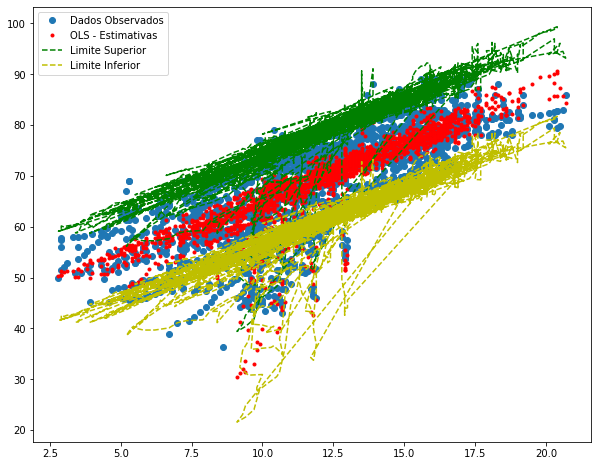

In [52]:
# Plot do Intervalo de Confiança
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Extrai os limites de confiança
_, ic_inferior, ic_superior = wls_prediction_std(model)

# Cria o plot
fig, ax = plt.subplots(figsize = (10,8))

# Define x e y
x = df.school
y = df.life_expectancy

# Adiciona as camadas
ax.plot(x, y, 'o', label = "Dados Observados")
ax.plot(x, model.fittedvalues, 'r.', label = "OLS - Estimativas")
ax.plot(x, ic_superior, 'g--', label = "Limite Superior")
ax.plot(x, ic_inferior, 'y--', label = "Limite Inferior")
ax.legend(loc = 'best');

## Variables (Regressors, Attributes)

###  coef (Coeficientes das variáveis) & P>|t| (P-value)

A seção central da saída, onde o cabeçalho começa com coef, é importante para a interpretação do modelo. 

O modelo ajustado implica que, ao comparar dois indivíduos onde a escolaridade (school) seja diferente em uma unidade, o indivíduo com escolaridade mais alta terá, em média, uma expectativa de vida mais alta do que 2.3888 unidades. 

Essa diferença é estatisticamente significativa, porque o valor p, mostrado na coluna rotulada P>|t|, é menor que o valor de significância de 0,05. Isso significa que há uma forte evidência de uma associação linear entre as variáveis 'school' e 'life_expectancy'.

Valor-p é a probabilidade de que eventos extremos ocorram sob a hipótese nula. Se o valor-p for menor que um determinado nível de significância α (uma escolha comum é α = 0,05), a hipótese nula será rejeitada, e um coeficiente de regressão é considerado significativo.

### T value

O teste-t está diretamente relacionado ao cálculo dos intervalos de confiança e está testando se um regressor, β̂k, é estatisticamente significativo. A estatística t para o coeficiente de regressão k-ésimo, sob a hipótese nula de que xk e y são independentes, segue uma distribuição t com graus de liberdade n-K.

Quando você realiza um teste t, geralmente tenta encontrar evidências de uma diferença significativa entre as médias populacionais (2 amostras t) ou entre a média populacional e um valor hipotético (1 amostra t).

O valor t mede o tamanho da diferença em relação à variação nos dados da amostra. Em outras palavras, **o valor t é simplesmente a diferença calculada representada em unidades de erro padrão. Quanto maior a magnitude do valor t, maior a evidência contra a hipótese nula. Isso significa que há uma evidência maior de que há uma diferença significativa. Quanto mais o valor de t estiver próximo de 0, maior a probabilidade de que não haja uma diferença significativa.**

Ou seja:

Valor t maior que +2 ou menor que -2 (e valor-p menor que 0.05) - rejeitamos a hipótese nula. O regressor é importante.

Valor t menor que +2 ou maior que -2 (e valor-p maior que 0.05) - não rejeitamos a hipótese nula. O regressor não é importante.

O valor t é calculado dividindo o valor estimado do parâmetro (coeficiente) pelo seu erro padrão. Essa estatística é uma medida da probabilidade de que o valor real do parâmetro não seja zero. Quanto maior o valor absoluto de t, menos provável que o valor real do parâmetro possa ser zero.

In [56]:
model.tvalues

Intercept          78.560346
bmi                 9.594792
hiv               -38.267213
gdp                 9.267338
thinness_till19    -2.253108
inf_death           0.272786
school             41.061964
lifestyle          -4.807773
pop_size           -3.586236
dtype: float64

### Variance Inflation Factor - VIF

O fator de inflação de variância (Variance Inflation Factor - VIF) é uma medida de colinearidade entre variáveis preditoras em uma regressão múltipla. É calculado considerando a razão da variância de todos os betas de um determinado modelo, dividida pela variância de um único beta, se este fosse adequado.

Etapas para implementar o VIF

- Execute uma regressão múltipla.
- Calcule os fatores VIF.
- Inspecione os fatores para cada variável preditora, se o VIF estiver entre 5 e 10, provavelmente haverá multicolinearidade e você deve considerar a possibilidade de descartar a variável.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

atrib = ['bmi', 'hiv', 'gdp', 'thinness_till19', 'school', 'lifestyle'] 
atributos = "+".join(atrib)

# Obtém X e y no formato de matrizes a partir da regressão
y, X = dmatrices('life_expectancy ~' + atributos, dataset, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Atributos"] = X.columns
vif

VIF Factor        Atributos
0   32.753952        Intercept
1    2.272781              bmi
2    1.089279              hiv
3    1.413162              gdp
4    1.593343  thinness_till19
5    2.189162           school
6    2.329312        lifestyle

## Residuals

- Os erros são normalmente distribuídos pelos dados. Em outras palavras, se você plotar os erros em um histograma, eles devem assumir a curva tradicional de sino ou a forma gaussiana.

- As variáveis independentes são realmente independentes e não colineares. Queremos garantir a independência entre todas as nossas entradas, caso contrário, nossas entradas afetarão uma à outra, em vez de nossa resposta.

- Existe "homoscedasticidade". Isso significa que a variação dos erros é consistente em todo o conjunto de dados. Queremos evitar situações em que a taxa de erro cresça em uma direção específica. Isto é homoscedástico:

<img src="images/homoscedastic.png" alt="Drawing" style="width: 400px;"/>

E isso não é homoscedástico:

<img src="images/not-homoscedastic.png" alt="Drawing" style="width: 400px;"/>

Observe que, no primeiro gráfico, a variação entre os pontos alto e baixo em qualquer valor X é aproximadamente o mesmo. No segundo gráfico, à medida que X cresce, o mesmo ocorre com a variação.

(array([  1.,   1.,  13.,  27., 206., 582., 841., 449.,  87.,  15.]),
 array([-26.03361323, -21.89057971, -17.74754619, -13.60451267,
         -9.46147915,  -5.31844563,  -1.17541211,   2.96762141,
          7.11065493,  11.25368845,  15.39672197]),
 <a list of 10 Patch objects>)

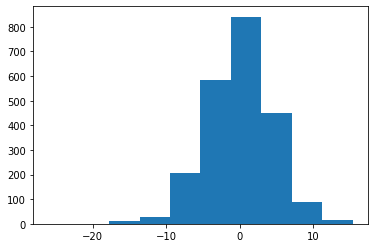

In [58]:
plt.hist(model.resid)

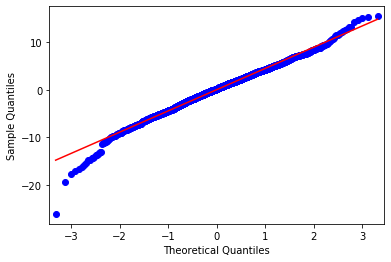

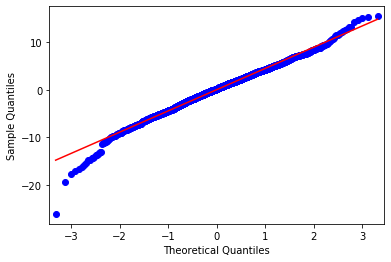

In [60]:
# Plot dos desvios dos resíduos - QQ Plot
from statsmodels import graphics
graphics.gofplots.qqplot(model.resid, line = 'r')

### Omnibus / Prob (Omnibus) 

Uma das suposições do OLS é que os erros são normalmente distribuídos. O teste Omnibus é realizado para verificar isso. Aqui, a hipótese nula é que os erros são normalmente distribuídos. O Prob (Omnibus) deve estar próximo de 1 para satisfazer o pressuposto do OLS. Em nosso caso, o Prob(Omnibus) é próximo de 0,000, o que implica que a suposição do OLS não é atendida. Por esse motivo, os coeficientes estimados a partir dele não são os melhores estimadores lineares não tendenciosos. O Omnibus é relativamente alto e o Prob(Omnibus) é relativamente baixo, portanto os dados não atendem às suposições do OLS, e não são ideais. Uma abordagem de regressão linear provavelmente seria melhor do que suposições aleatórias, mas provavelmente não tão boa quanto uma abordagem não-linear.

In [61]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

nome1 = ['Omnibus (Chi^2)', 'Prob(Omnibus) (Two-tail probability)'] # lista de estatísticas
teste1 = sms.omni_normtest(model.resid) # teste
lzip(nome1, teste1) # imprime o resultado

[('Omnibus (Chi^2)', 83.61812244231328),
 ('Prob(Omnibus) (Two-tail probability)', 6.959137510276606e-19)]

### Jarque-Bera (JB) / Prob (JB) / Skew / Kurtosis


Jarque-Bera (JB) / Prob (JB) - Estatística para a análise de distribuição dos erros de regressão. Supõe-se que esteja de acordo com os resultados do teste Omnibus. Um grande valor da estatística JB indica que os erros não são normalmente distribuídos.

Skew - Uma medida da simetria dos dados. Queremos ver algo próximo de zero, indicando que a distribuição residual é normal.

Kurtosis - Uma medida de "pico" ou curvatura dos dados. Picos mais altos levam a uma maior curtose. A curtose maior pode ser interpretada como um agrupamento mais restrito de resíduos em torno de zero, implicando um modelo melhor com poucos discrepantes.

In [62]:
nome2 = ['Jarque-Bera', 'Prob(JB)', 'Skew'] # lista de estatísticas
teste2 = sms.jarque_bera(model.resid) # test
lzip(nome2, teste2) # imprime o resultado

[('Jarque-Bera', 143.9911603144584),
 ('Prob(JB)', 5.404018365429641e-32),
 ('Skew', -0.30772080360052967)]

### Durbin-Watson - Testes de homocedasticidade. 

Esperamos ter um valor entre 1 e 2. O "teste de Durbin-Watson para autocorrelação" é uma estatística que indica a probabilidade de que os valores de desvio (erro) da regressão tenham um componente de regressão automática de primeira ordem. Os modelos de regressão assumem que os desvios de erro não estão correlacionados. Pequenos valores da estatística Durbin-Watson indicam a presença de autocorrelação. No entanto, um valor menor que 0,80 geralmente indica que é provável a autocorrelação. Se a estatística Durbin-Watson indicar que os valores residuais são correlacionados automaticamente, é recomendável exibir um gráfico dos valores residuais.


Ao examinar os dados, vemos um conjunto de características "OK" (embora não ótimo). Isso indicaria que a abordagem OLS tem alguma validade, mas provavelmente podemos fazer melhor com um modelo não linear. Ou ainda precisamos trabalhar um pouco mais no processamento dos dados. Mas provavelmente precisamos de mais variáveis!

Em Data Science há uma grande quantidade de "arte" envolvida na criação do modelo certo. Compreender como seus dados "se comportam" é um primeiro passo sólido nessa direção e geralmente pode fazer a diferença entre um bom modelo e um muito melhor.

### Condition Number
Essa estatística mede a sensibilidade da saída de uma função em comparação à sua entrada. Quando temos multicolinearidade, podemos esperar flutuações muito maiores para pequenas alterações nos dados; portanto, esperamos ver um número relativamente pequeno, algo abaixo de 30. m

# Regressão Logística

## Intervalos de Confiança

## P values

## Odds Ratio

## Fator de Sinergia

https://bmcresnotes.biomedcentral.com/articles/10.1186/1756-0500-2-105

## Risk Ratio

## Absolute Risk Reduction 

# Statistical Analysis

In [4]:
from sklearn.datasets import load_iris
import pandas as pd , numpy as np, scipy.stats as st
%config Completer.use_jedi = False

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']

## Mean, Median and Mode

In [5]:
df.sepal_length.mean()

5.843333333333334

In [6]:
df.sepal_length.median()

5.8

In [9]:
df.sepal_length.mode()

0    5.0
dtype: float64

In [11]:
df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

## Variance & Standard Deviation

## Distributions

## Confidence Intervals

### Mean

In [14]:
st.t.interval(0.95, len(df.sepal_length)-1, loc=np.mean(df.sepal_length), scale=st.sem(df.sepal_length))

(5.709732481507366, 5.976934185159301)